# Explore data and creted a helper function to get feature description

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
info_df = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [3]:
info_df

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [4]:
def get_features_info(feature_name):
    print(info_df.loc[feature_name]['Description'])

In [5]:
get_features_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


# Importing Data

In [6]:
df = pd.read_csv('lending_club_loan_two.csv')

In [7]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# EDA

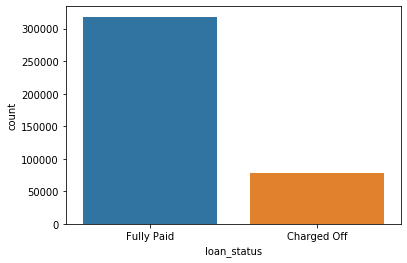

In [9]:
sns.countplot(x='loan_status',data=df)

In [10]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


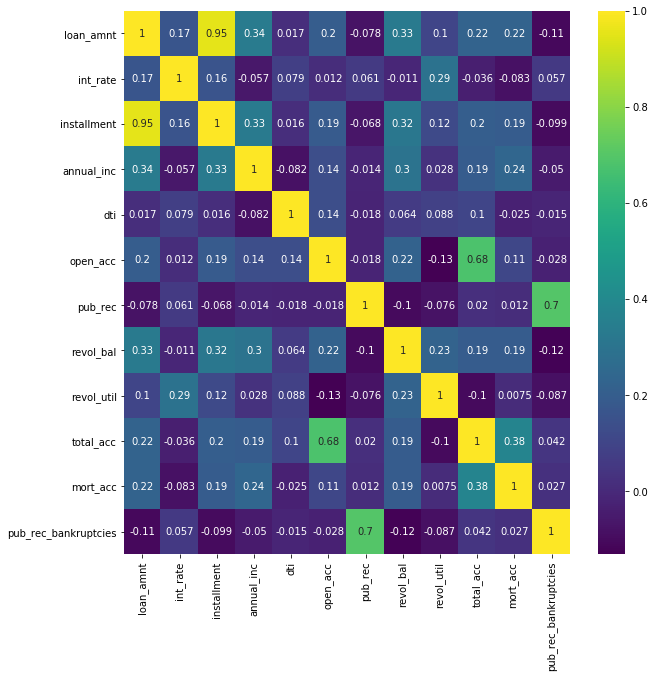

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

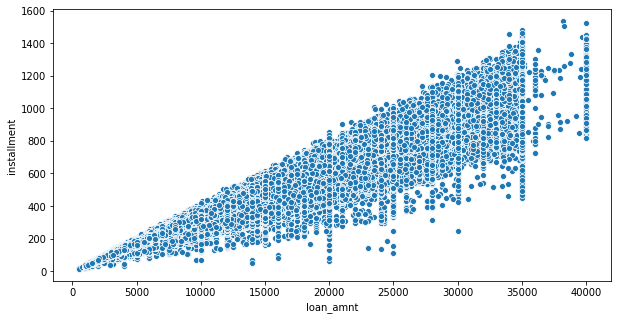

In [12]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='loan_amnt',y='installment',data=df)

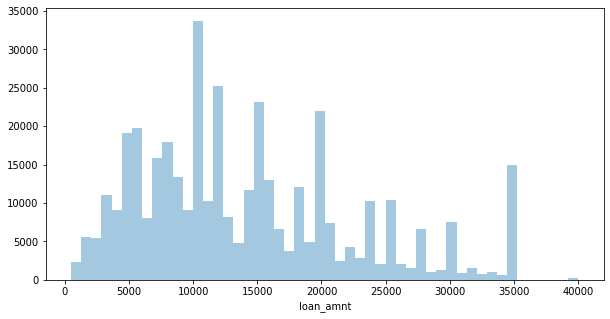

In [13]:
plt.figure(figsize=(10,5))
sns.distplot(df['loan_amnt'],bins=50,kde=False)

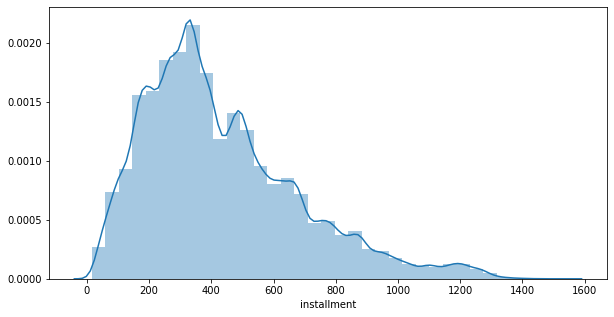

In [14]:
plt.figure(figsize=(10,5))
sns.distplot(df['installment'],bins=35,kde=True)

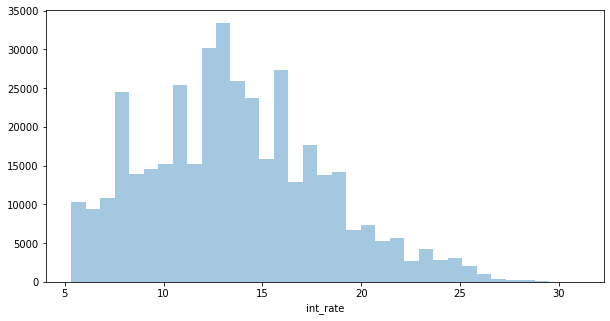

In [15]:
plt.figure(figsize=(10,5))
sns.distplot(df['int_rate'],bins=35,kde=False)

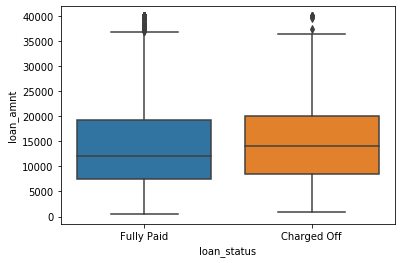

In [16]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [17]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Transforming target**

In [18]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [19]:
df.drop('loan_status',axis=1,inplace=True)

In [20]:
df.corr()['loan_repaid'].sort_values(ascending=False)

loan_repaid             1.000000
mort_acc                0.073111
annual_inc              0.053432
total_acc               0.017893
revol_bal               0.010892
pub_rec_bankruptcies   -0.009383
pub_rec                -0.019933
open_acc               -0.028012
installment            -0.041082
loan_amnt              -0.059836
dti                    -0.062413
revol_util             -0.082373
int_rate               -0.247758
Name: loan_repaid, dtype: float64

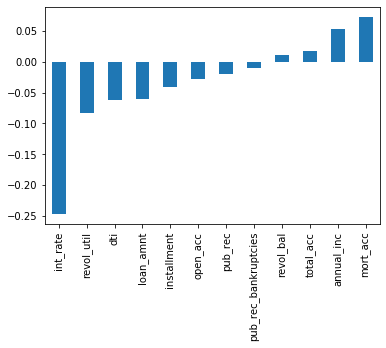

In [21]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

# Checking Null values and transforming text values into dummy variables

In [22]:
#plt.figure(figsize=(12,10))
#sns.heatmap(df.isnull(),cbar=False)

In [23]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [24]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [25]:
df['term'] = df['term'].str.rstrip('months')

In [26]:
df['term']

0          36 
1          36 
2          36 
3          36 
4          60 
          ... 
396025     60 
396026     36 
396027     36 
396028     60 
396029     36 
Name: term, Length: 396030, dtype: object

In [27]:
df['term'] = pd.to_numeric(df['term'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  title                 394275 non-null  object 
 14  dti                   396030 non-null  float64
 15  

In [29]:
df[['grade','sub_grade']]

,grade,sub_grade
0,B,B4
1,B,B5
2,B,B3
3,A,A2
4,C,C5
...,...,...
396025,B,B4
396026,C,C1
396027,B,B1
396028,C,C2


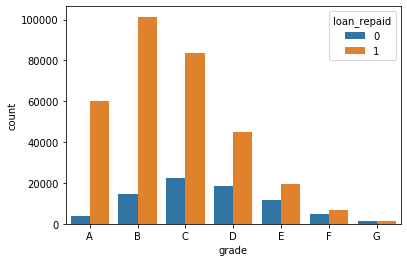

In [30]:
sns.countplot(x='grade',data=df.sort_values('grade'),hue='loan_repaid')

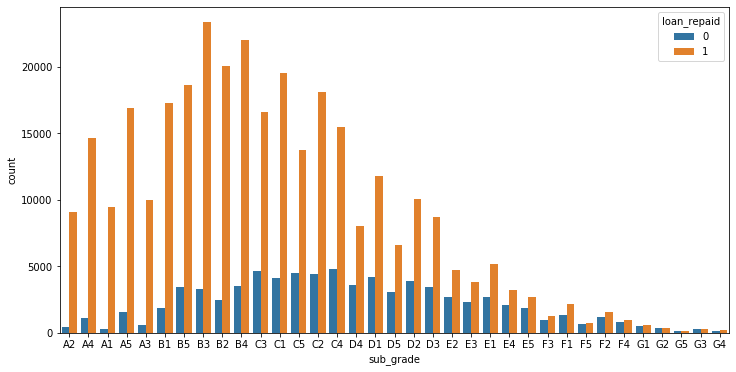

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade',data=df.sort_values('grade'),hue='loan_repaid')

**Grade and subgrade are representing similar data points so one of the columns can be dropped and converting other column to dummy columns**

In [32]:
df.drop('grade',axis=1,inplace=True)

In [33]:
df = pd.concat([df,pd.get_dummies(df['sub_grade'],drop_first=True)],axis=1)

In [34]:
df.drop('sub_grade',axis=1,inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 59 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   emp_title             373103 non-null  object 
 5   emp_length            377729 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   issue_d               396030 non-null  object 
 10  purpose               396030 non-null  object 
 11  title                 394275 non-null  object 
 12  dti                   396030 non-null  float64
 13  earliest_cr_line      396030 non-null  object 
 14  open_acc              396030 non-null  float64
 15  

In [36]:
df['emp_title'].isnull().sum()

22927

In [37]:
df['emp_title'].value_counts()

Teacher                                4389
Manager                                4250
Registered Nurse                       1856
RN                                     1846
Supervisor                             1830
                                       ... 
Misys                                     1
SENIOR DATABASE ADMIN                     1
District Court Clerk                      1
NYC Dept of Corrections                   1
Indian Prairie School District #204       1
Name: emp_title, Length: 173105, dtype: int64

**There are too many unique values so there is no point converting this variable to dummy variables**

In [38]:
df.drop('emp_title',axis=1,inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 58 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   emp_length            377729 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   verification_status   396030 non-null  object 
 8   issue_d               396030 non-null  object 
 9   purpose               396030 non-null  object 
 10  title                 394275 non-null  object 
 11  dti                   396030 non-null  float64
 12  earliest_cr_line      396030 non-null  object 
 13  open_acc              396030 non-null  float64
 14  pub_rec               396030 non-null  float64
 15  

In [40]:
df.select_dtypes(['object']).columns

Index(['emp_length', 'home_ownership', 'verification_status', 'issue_d',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [41]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [42]:
df['emp_length'].isnull().sum()

18301

In [43]:
df.drop('emp_length',axis=1,inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 57 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   home_ownership        396030 non-null  object 
 5   annual_inc            396030 non-null  float64
 6   verification_status   396030 non-null  object 
 7   issue_d               396030 non-null  object 
 8   purpose               396030 non-null  object 
 9   title                 394275 non-null  object 
 10  dti                   396030 non-null  float64
 11  earliest_cr_line      396030 non-null  object 
 12  open_acc              396030 non-null  float64
 13  pub_rec               396030 non-null  float64
 14  revol_bal             396030 non-null  float64
 15  

In [45]:
df.drop('issue_d',axis=1,inplace=True)

In [46]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'purpose', 'title',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [47]:
df.drop('address',axis=1,inplace=True)

In [48]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [49]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [50]:
df = pd.concat([df,pd.get_dummies(df['home_ownership'],drop_first=True)],axis=1)
df.drop('home_ownership',axis=1,inplace=True)

In [51]:
df.select_dtypes(['object']).columns

Index(['verification_status', 'purpose', 'title', 'earliest_cr_line',
       'initial_list_status', 'application_type'],
      dtype='object')

In [52]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [53]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [54]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [55]:
df['purpose'].nunique()

14

In [56]:
df['title'].nunique()

48817

In [57]:
df.drop('title',axis=1,inplace=True)

In [58]:
df.select_dtypes(['object']).columns

Index(['verification_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type'],
      dtype='object')

In [59]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))

In [60]:
df.drop('earliest_cr_line',axis=1,inplace=True)

In [61]:
df['initial_list_status'].nunique()

2

In [62]:
df['application_type'].nunique()

3

In [63]:
df = pd.concat([df,pd.get_dummies(df[['verification_status','purpose','initial_list_status','application_type']],drop_first=True)],axis=1)

In [64]:
df.drop(['verification_status','purpose','initial_list_status','application_type'],axis=1,inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 70 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   term                                 396030 non-null  int64  
 2   int_rate                             396030 non-null  float64
 3   installment                          396030 non-null  float64
 4   annual_inc                           396030 non-null  float64
 5   dti                                  396030 non-null  float64
 6   open_acc                             396030 non-null  float64
 7   pub_rec                              396030 non-null  float64
 8   revol_bal                            396030 non-null  float64
 9   revol_util                           395754 non-null  float64
 10  total_acc                            396030 non-null  float64
 11  mort_acc     

In [66]:
df.drop('mort_acc',axis=1,inplace=True)

## Train Test Split

In [67]:
len(df)

396030

In [70]:
df.isnull().sum().sort_values(ascending=False)

pub_rec_bankruptcies      535
revol_util                276
application_type_JOINT      0
B1                          0
B3                          0
                         ... 
F3                          0
F2                          0
F1                          0
E5                          0
loan_amnt                   0
Length: 69, dtype: int64

In [72]:
df = df.dropna()

In [94]:
df.isnull().sum().sort_values(ascending=False)

application_type_JOINT    0
C3                        0
B2                        0
B3                        0
B4                        0
                         ..
F3                        0
F2                        0
F1                        0
E5                        0
loan_amnt                 0
Length: 69, dtype: int64

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 69 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   dti                                  395219 non-null  float64
 6   open_acc                             395219 non-null  float64
 7   pub_rec                              395219 non-null  float64
 8   revol_bal                            395219 non-null  float64
 9   revol_util                           395219 non-null  float64
 10  total_acc                            395219 non-null  float64
 11  pub_rec_bankr

In [75]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
scaler = MinMaxScaler()

In [80]:
X_train = scaler.fit_transform(X_train)

In [81]:
X_test = scaler.transform(X_test)

# Model Training

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [96]:
model =Sequential()
# input layer
model.add(Dense(69,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(35, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(17, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [97]:
from tensorflow.keras.callbacks import EarlyStopping

In [98]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [104]:
model.fit(x=X_train,y=y_train,epochs=2,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/2
9881/9881 [==============================] - 17s 2ms/step - loss: 0.4491 - val_loss: 0.4538
Epoch 2/2
9881/9881 [==============================] - 17s 2ms/step - loss: 0.4494 - val_loss: 0.4539


In [105]:
from tensorflow.keras.models import load_model

In [106]:
model.save('loan_repayment_prediction_model.h5')  

In [107]:
losses = pd.DataFrame(model.history.history)

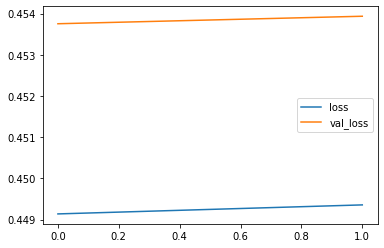

In [108]:
losses[['loss','val_loss']].plot()

In [91]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [93]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.58      0.03      0.06     15658
           1       0.81      0.99      0.89     63386

    accuracy                           0.80     79044
   macro avg       0.69      0.51      0.48     79044
weighted avg       0.76      0.80      0.73     79044

